In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
heart_df=pd.read_csv("./heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_df["target"].value_counts(), heart_df["target"].value_counts(normalize=True)

(1    165
 0    138
 Name: target, dtype: int64,
 1    0.544554
 0    0.455446
 Name: target, dtype: float64)

<AxesSubplot:>

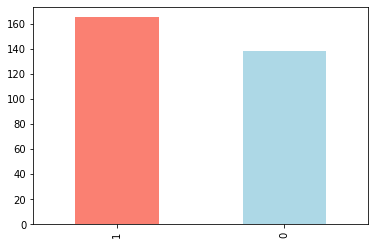

In [6]:
heart_df["target"].value_counts().plot.bar(color=["salmon","lightblue"])

## by checking sex_value  to target

In [7]:
pd.crosstab(heart_df["sex"],heart_df["target"])

target,0,1
sex,,
0,24,72
1,114,93


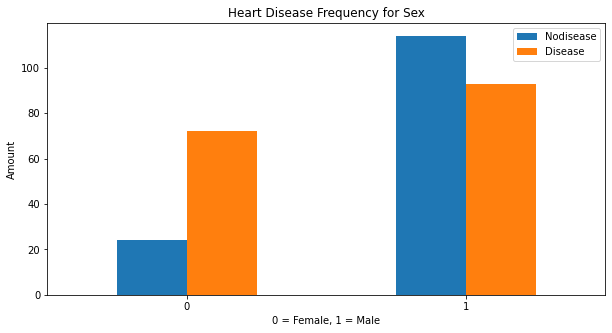

In [8]:
pd.crosstab(heart_df["sex"],heart_df["target"]).plot(kind="bar",figsize=(10,5))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Amount")
plt.legend(["Nodisease", "Disease"])
plt.xticks(rotation=0);

## now by coupling two or more column for target 

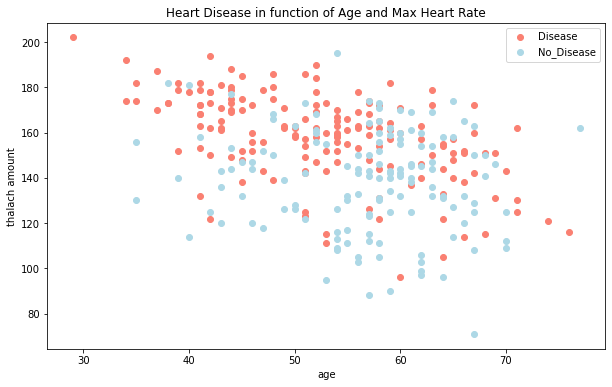

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(heart_df.age[heart_df.target==1],heart_df.thalach[heart_df.target==1],c=("salmon"));
plt.scatter(heart_df.age[heart_df.target==0],heart_df.thalach[heart_df.target==0],c=("lightblue"));
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("thalach amount")
plt.legend(["Disease","No_Disease"]);

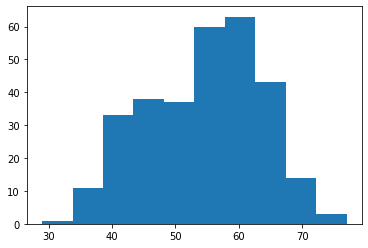

In [10]:
# histograph of age
plt.hist(heart_df.age); # or u can write this also   `heart_df.age.plot.hist()`

## now one more time chest_pain

In [11]:
heart_df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
pd.crosstab(heart_df.cp,heart_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


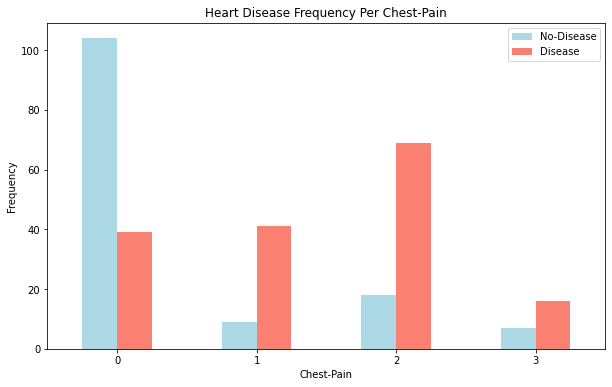

In [13]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind="bar",figsize=(10,6),color=["lightblue","salmon"])
plt.title("Heart Disease Frequency Per Chest-Pain")
plt.xlabel("Chest-Pain")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(["No-Disease","Disease"]);


In [14]:
corr_matrix=heart_df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


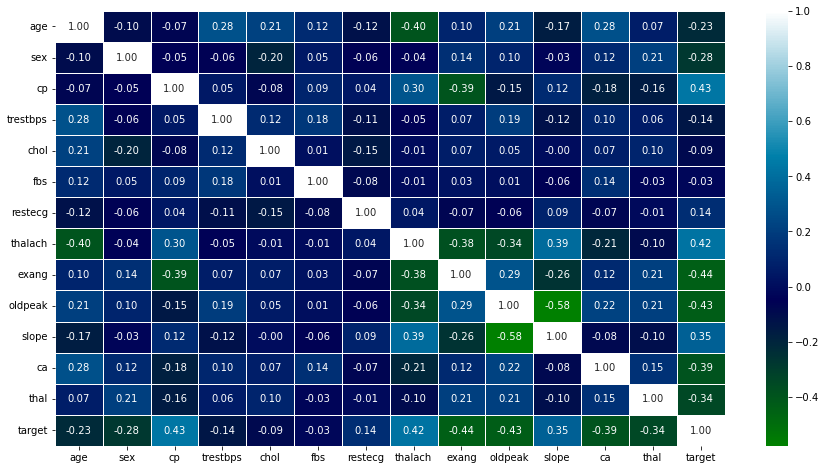

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True, linewidths=1,fmt=".2f",cmap="ocean");

In [11]:
np.random.seed(42)
x=heart_df.drop("target",axis=1)
y=heart_df.target
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25)

In [17]:
x_tr.shape

(227, 13)

In [18]:
x_te.shape

(76, 13)

In [12]:
models={"KNN":KNeighborsClassifier(),
       "Random forest":RandomForestClassifier(),
       "Logistic Regression":LogisticRegression()}
model_scores={}
np.random.seed(42)
def fit_and_score(models,x_tr,x_te,y_tr,y_te):
    for name ,model in models.items():
         model.fit(x_tr,y_tr)
         model_scores[name] =model.score(x_te,y_te)
    return model_scores; 


In [20]:
models_score=fit_and_score(models=models,x_tr=x_tr,x_te=x_te,y_tr=y_tr,y_te=y_te)
models_score

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6973684210526315,
 'Random forest': 0.8157894736842105,
 'Logistic Regression': 0.881578947368421}

(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Random forest'),
  Text(2, 0, 'Logistic Regression')])

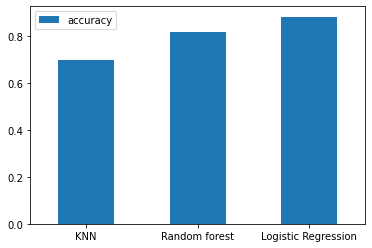

In [21]:
model_compare=pd.DataFrame(models_score,index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)

# Now we were tuning hyperparameter by gridsearchcv in KNN model

In [22]:
leafsize = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
np.random.seed(42)
hyperparameter={"leaf_size":leafsize,
               "n_neighbors":n_neighbors,
              "p":p}
model=KNeighborsClassifier()
clf=GridSearchCV(model,hyperparameter,cv=5)
clf.fit(x_tr,y_tr)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [23]:
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

In [25]:
model1=clf.score(x_te,y_te) # best score by KNN model in this method 

## now  tuning hyperparameter of `Logistic regression`

### to aviod overfiting in model fitting , regularization is used in which we mainly 2 method
* l1 regularization 
* l2 regrularization 
* now here `c` will be used as inverse of regularization strength

In [21]:
np.random.seed(42)
log_para={"C":np.logspace(-3,3,num=20),
          "solver":["newton-cg","liblinear","saga","lbfgs"],
         "penalty":["l1","l2","None"]}

clf=GridSearchCV(LogisticRegression(),log_para,cv=5,verbose=True)
clf.fit(x_tr,y_tr)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['newton-cg', 'liblinear', 'saga', 'lbfgs']},
             verbose=True)

In [22]:
model2=clf.score(x_te,y_te)
model2

0.8947368421052632

In [23]:
clf.best_params_

{'C': 0.3359818286283781, 'penalty': 'l2', 'solver': 'lbfgs'}

In [13]:
np.random.seed(42)
ran_para={"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
ran_para


{'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [18]:
np.random.seed(42)

clf1=RandomizedSearchCV(RandomForestClassifier(),ran_para,cv=5,n_iter=20)
clf1.fit(x_tr,y_tr)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [19]:
model3=clf1.score(x_te,y_te)
model3

0.868421052631579

* but in the last right model is logistic regression among 3's
## now we gonna use that one

In [24]:
y_pre=clf.predict(x_te)
y_pre

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

E:\Machine_Learning\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


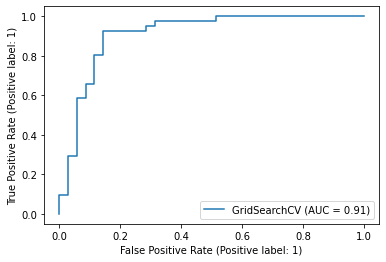

In [25]:
plot_roc_curve(clf,x_te,y_te)

In [27]:
confusion_matrix(y_te,y_pre)

array([[30,  5],
       [ 3, 38]], dtype=int64)

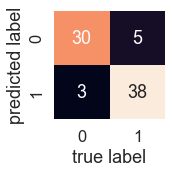

In [30]:
sns.set(font_scale=1.5)
def plot_confusion_mat (y_te,y_pre):
    fig,ax=plt.subplots(figsize=(2,2))
    ax=sns.heatmap(confusion_matrix(y_te,y_pre),annot=True,cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_confusion_mat(y_te,y_pre)

In [38]:
print(classification_report(y_te,y_pre))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [47]:
model=LogisticRegression(C=0.3359818286283781, penalty= "l2", solver= "lbfgs",max_iter=1000)


In [48]:
model.fit(x_tr,y_tr)
model.score(x_te,y_te)

0.8947368421052632

In [50]:
cv_acc=np.mean(cross_val_score(model,x,y,cv=5,scoring="accuracy"))
cv_pre=np.mean(cross_val_score(model,x,y,cv=5,scoring="precision"))
cv_re=np.mean(cross_val_score(model,x,y,cv=5,scoring="recall"))
cv_f1=np.mean(cross_val_score(model,x,y,cv=5,scoring="f1"))
cv_acc,cv_pre,cv_re,cv_f1

(0.8347540983606556, 0.8174605631726374, 0.903030303030303, 0.8574063034215786)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'accuracy'),
  Text(1, 0, 'precision'),
  Text(2, 0, 'recall'),
  Text(3, 0, 'f1-score')])

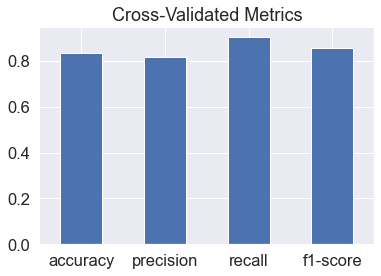

In [61]:
cv_metrics=pd.DataFrame({
    "accuracy":cv_acc,
    "precision":cv_pre,
    "recall":cv_re,
    "f1-score":cv_f1
},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics",legend=False);
plt.xticks(rotation=0)

## feature importance
*which one of feature contribute to target`

In [62]:
model.fit(x_tr,y_tr)

LogisticRegression(C=0.3359818286283781, max_iter=1000)

In [63]:
model.coef_

array([[-2.65188635e-04, -9.39038067e-01,  7.46812701e-01,
        -1.18176014e-02, -1.60855678e-03,  1.77844936e-02,
         4.81676910e-01,  1.79298983e-02, -7.36142210e-01,
        -5.88384268e-01,  5.13711880e-01, -7.13533113e-01,
        -8.14063129e-01]])

In [64]:
feature_dict=dict(zip(heart_df.columns,model.coef_[0]))
feature_dict

{'age': -0.00026518863462234726,
 'sex': -0.9390380666025547,
 'cp': 0.7468127013333455,
 'trestbps': -0.011817601446463917,
 'chol': -0.0016085567754600507,
 'fbs': 0.017784493613528074,
 'restecg': 0.4816769095445175,
 'thalach': 0.01792989829359067,
 'exang': -0.736142210026052,
 'oldpeak': -0.5883842681945574,
 'slope': 0.5137118801777392,
 'ca': -0.7135331131159182,
 'thal': -0.8140631286596338}

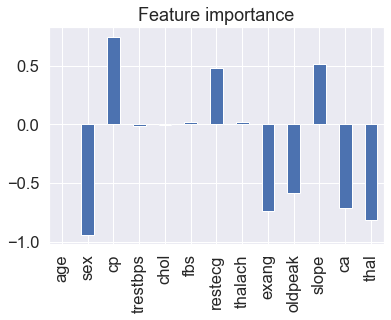

In [72]:
feat=pd.DataFrame(feature_dict,index=[0])
feat.T.plot.bar(title='Feature importance',legend=False)
plt.xticks(rotation=90);

In [74]:
pd.crosstab(heart_df["sex"], heart_df["target"])

target,0,1
sex,,
0,24,72
1,114,93
